# Exercises for 2021-02-23

In [1]:
using LinearAlgebra
using Plots

## Noisy stationary solvers

Consider the iteration
$$
  M x_{k+1} = K x_k + b + \xi_k
$$
where we assume $R = M^{-1} K$ has two-norm $\|R\| = \alpha < 1$.  Let $x_* = A^{-1} b$ where $A = M-K$.

1. If the noise vectors $\xi_k$ are always zero, argue that $x_k \rightarrow x_*$.
2. Now suppose $\xi_k$ is not zero.  Write an iteration equation for the error $e_k = x_k-x_*$, i.e.
   write $e_{k+1}$ in terms of $e_k$ and $\xi_k$.
3. Suppose that $\xi_k$ is $N(0, \sigma^2 I)$ and independent of $x_k$.  Argue that
   $$E[\|e_{k+1}\|^2] \leq \alpha^2 E[\|e_k\|^2] + \|M^{-1}\|_F^2 \sigma^2.$$
4. Argue that if $x_0$ is a fixed (non-random) starting guess, then
   $$E[\|e_k\|^2] \lesssim \frac{\|M^{-1}\|_F^2 \sigma^2}{1-\alpha^2} + \alpha^{2k} \|e_0\|.$$
   (Note: you may cite results from the course notes without re-proving them.)

## Answers
1. If the noise vectors $\xi_k$ are always zero, then 

2. If the noise vectors $\xi_k$ are non-zero, subtracting the the fixed point equation $ M x_* = kx_* + b$ yields

$$
  M (x_{k+1}- x_*) = K (x_k - x_*) + \xi_k \\
  M e_{k+1} = K e_k + \xi_k \\
  e_{k+1} = R e_k + M^{-1}\xi_k .\\
$$

3. Taking the norm of the iteration equation for $e_{k+1}$, then squaring both sides and applying submultiplicativity yields

$$
 \|e_{k+1}\|^2 = \|R e_k\|^2 + \|M^{-1}\xi_k \|^2 + 2\langle Re_k,  M^{-1}\xi_k  \rangle\\
 \|e_{k+1}\|^2 \le \alpha^2 \| e_k\|^2 + \|M^{-1}\|^2 \|\xi_k \|^2 + 2\langle Re_k,  M^{-1}\xi_k  \rangle. 
$$

Now, for the independent variables $e_k$ and $\xi_k$, 
$$
\langle Re_k,  M^{-1}\xi_k  \rangle = E[Re_k * M^{-1}\xi_k] = E[Re_k]E[M^{-1}\xi_k].
$$

Given that $E[\xi_k] = 0,$
$$
 \|e_{k+1}\|^2 \le \alpha^2 \| e_k\|^2 + \|M^{-1}\|^2 \|\xi_k \|^2 . 
$$

Taking the expectation of both sides and applying the relation between the Frobenius and Euclidean norm yields

$$
E[  \|e_{k+1}\|^2]  \le \alpha^2 E[ \| e_k\|^2] + \|M^{-1}\|^2E[ \|\xi_k \|^2]\\
E[  \|e_{k+1}\|^2]  \le \alpha^2 E[ \| e_k\|^2] + \|M^{-1}\|^2E[ \xi_k^2]\\
E[  \|e_{k+1}\|^2]  \le \alpha^2 E[ \| e_k\|^2] + \|M^{-1}\|^2_FE[ \xi_k^2]\\
$$

Finally, for zero mean, $ Var( \xi_k) = E[ \xi_k^2]$. Thus, 
$$
E[  \|e_{k+1}\|^2]  \le \alpha^2 E[ \| e_k\|^2] + \|M^{-1}\|^2_F \sigma^2\\
$$
as desired. 

4. If $x_0$ is a non-random starting guess then

## SGD for least squares

Consider the function
$$
  \phi(x) = \int_{-4}^4 (c_1 + c_2 x^2 + c_3 x^4 - \cos(x))^2 \, dx.
$$
The optimum is given by $Gc = b$ where
$$
  G = \int_{-4}^4 \begin{bmatrix} 1 & x^2 & x^4 \\ x^2 & x^4 & x^6 \\ x^4 & x^6 & x^8 \end{bmatrix} \, dx
$$
and
$$
  b = \int_{-4}^4 \begin{bmatrix} 1 \\ x^2 \\ x^4 \end{bmatrix} \cos(x) \, dx
$$

In [2]:
ATA = 2*[4      4^3/3  4^5/5
         4^3/3  4^5/5  4^7/7
         4^5/5  4^7/7  4^9/9]
ATcos = 2*[sin(4), (4^2-2)*sin(4) + 2*4*cos(4), 4*4*(4^2-6)*cos(4) + (4^4-12*4^2+24)*sin(4)]
cref = ATA\ATcos

3-element Array{Float64,1}:
  0.9230226871699837
 -0.3929542880606887
  0.019209626796745604

## TODO: Sanity check this computation by comparing to a least squares problem with a mesh of 100 points on the indicated interval.

norm(cref-clsq)/norm(cref) = 0.004984416226491565

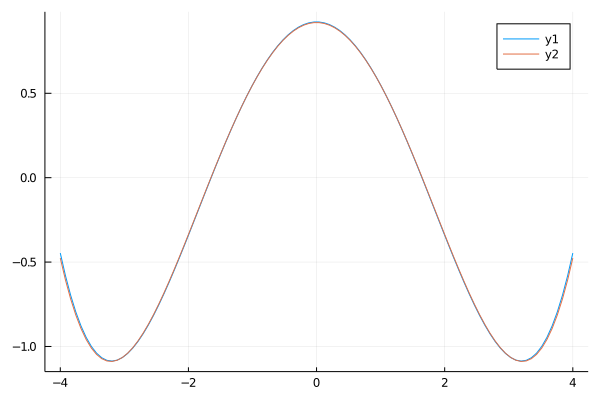

In [3]:
# Mesh of 100 points on [-4,4]
num  = 100
vals = LinRange(-4,4,num)

# Matrix of coefficients
A    = zeros(num,3)
for j = 1:num
   A[j,:] = map(i -> vals[j].^i, [0,2,4])
end
y       = map(cos  , vals)

# Get min 
clsq = A\y

# Check sol
using Plots
poly(c,x)  = c[1] + c[2]x^2 + c[3]x^4
print("norm(cref-clsq)/norm(cref) = $(norm(cref-clsq)/norm(cref))")    
fig = plot()
for c in (cref,clsq) 
    plot!(fig, vals, x -> poly(c,x)) 
end
fig

In [4]:
vals = LinRange(-4,4,100)
# Matrix of coefficients
A    = zeros(100,3)
for j = 1:100
   A[j,:] = map(i -> vals[j].^i, [0,2,4])
end
y       = map(cos  , vals)
# Get min 
c = A\y
norm(c-cref)

0.005001217699203607

In [5]:
xx = Array(range(-4, 4, length=101))
xx = (xx[1:end-1] + xx[2:end])/2     # Midpoints of 100 panels
# Fill in here

100-element Array{Float64,1}:
 -3.96
 -3.88
 -3.8
 -3.7199999999999998
 -3.64
 -3.56
 -3.48
 -3.4
 -3.32
 -3.24
 -3.16
 -3.08
 -3.0
  ⋮
  3.08
  3.16
  3.24
  3.32
  3.4
  3.48
  3.56
  3.64
  3.7199999999999998
  3.8
  3.88
  3.96

TODO (2 points): Write an SGD solver for minimizing $\phi$ using $2 \times 10^5$ steps and a random sample of $B = 20$ points for the gradient estimates, starting from $c = [1 0 0]^T$.  Plot $\phi(\hat{c})-\phi(c_*)$ on a semilog plot.  What do you observe?